In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from simulation.analyse import get_win_probabilities, get_simulations

In [2]:
match_template = pd.read_csv('data/original/wc_2018_games.csv')
teams = pd.unique(match_template[['home_team', 'away_team']].values.ravel('K'))[0:32]
match_ids = match_template["id"]

simulations = get_simulations("data/simulations/outcome/*.csv")

In [3]:
match_wise_probabilities = get_win_probabilities(simulations, teams, match_ids)

/Users/villetoiviainen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


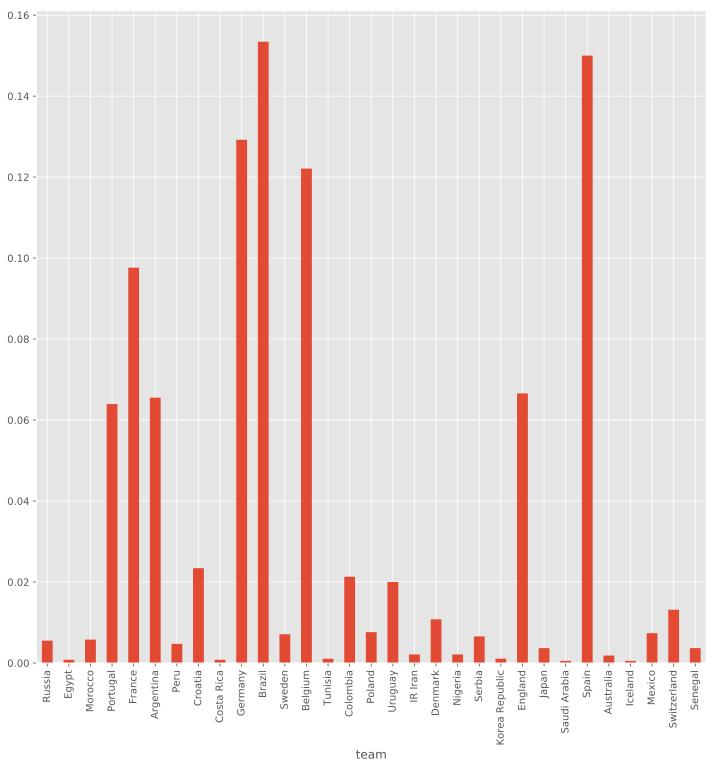

In [4]:
final = match_wise_probabilities.loc[match_wise_probabilities["match_id"] == 63]
final["World Cup 2018 Win Probability"] = final["plays_match_prob"] * final["win_prob"]
final[['World Cup 2018 Win Probability','team']].set_index('team').plot.bar(legend=False, figsize=(12,12))